In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

1. DataSet :

dimensions de X (100, 2)
dimensions de y (100, 1)


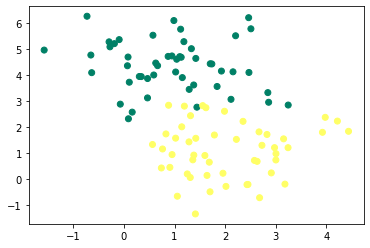

In [2]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape((y.shape[0],1))

print('dimensions de X',X.shape)
print('dimensions de y',y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()


2. Model Functions :

In [3]:
def initialize(X):
    W=np.random.rand(X.shape[1],1)
    b=np.random.rand(1)
    return (W,b)

In [4]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A;

In [5]:
W,b=initialize(X)
A=model(X,W,b)
print (A.shape)
print(W.shape)
print(b.shape)

(100, 1)
(2, 1)
(1,)


In [6]:
def log_loss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [7]:
def gradients(A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*np.sum(A-y)
    return (dW,db) 

In [8]:
def update(dW,db,W,b,learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [9]:
def predict(X,W,b):
    A=model(X,W,b)
    return A>=0.5

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
def artificial_neural(X, y, learning_rate=0.1,n_iter=100):
    W,b=initialize(X)
    loss=[]
    for i in range(n_iter):
        A=model(X,W,b)
        loss.append(log_loss(A,y))
        dW,db=gradients(A,X,y)
        W,b=update(dW,db,W,b,learning_rate)

    y_predicted=predict(X,W,b)
    print(accuracy_score(y,y_predicted))
    plt.plot(loss)
    plt.show()
    return (W,b)

0.89


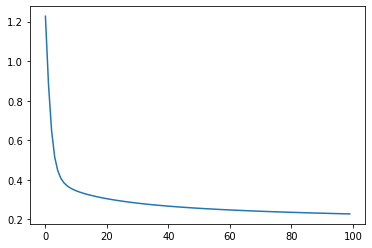

[[ 1.14192439]
 [-1.06213993]]


In [12]:
W,b=artificial_neural(X,y)
print(W)

3. Decision Boundary :

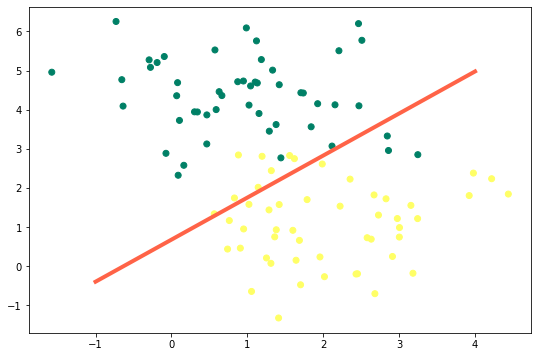

In [13]:
fig, ax=plt.subplots(figsize=(9,6))
ax.scatter(X[:,0], X[:,1],c=y,cmap="summer")
x1=np.linspace(-1, 4, 100)
x2=(-W[0]*x1 - b)/W[1]
ax.plot(x1,x2,c='Tomato',lw=4)

4. 3D Visualisation :

In [14]:
import plotly.graph_objects as gObj

In [15]:
fig=gObj.Figure(data=[gObj.Scatter3d(
    x=X[:,0].flatten(),
    y=X[:,1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
        )
)])
fig.update_layout(template='plotly_dark',margin=dict(l=0,r=0,b=0,t=0))
fig.layout.scene.camera.projection.type='orthographic'
fig.show()

In [16]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (gObj.Figure(data=[gObj.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()